In [ ]:
!pip install stellargraph

     |████████████████████████████████| 435 kB 28.3 MB/s 


In [ ]:
import networkx as nx
from networkx.classes.function import info

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from sklearn import preprocessing, model_selection
import sklearn
from sklearn import model_selection
from collections import Counter
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from itertools import repeat
%matplotlib inline

In [ ]:
graph = nx.read_gml('graph_gcn.gml')
node_subjects = nx.get_node_attributes(graph,'genre')
vectors = nx.get_node_attributes(graph,'vector')

In [ ]:
list_node_subjects = list(node_subjects)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [ ]:
counter =0
list_of_ids =[]
for key, value in node_subjects.items():
    if len(value) != 0:
        list_of_ids.append(counter)
    counter +=1

In [ ]:
index_list = [*range(0, 17777, 1)] 
index_list2 = [*range(0, counter, 1)]
node_subjects= pd.Series(list(node_subjects.values())[0:17777], index = index_list, name= "genre")

0        country
1          blues
2            pop
3          blues
4         reggae
          ...   
17772        pop
17773        pop
17774        pop
17775    country
17776    hip hop
Name: genre, Length: 17777, dtype: object


In [ ]:
node_subjects[node_subjects == 'country'] = 'rock'
node_subjects[node_subjects == 'jazz'] = 'blues'

In [ ]:
list_subjects = node_subjects.tolist()
list_subjects.extend(repeat('word',counter - 17777 ))

['rock',
 'blues',
 'pop',
 'blues',
 'reggae',
 'rock',
 'pop',
 'rock',
 'rock',
 'reggae',
 'rock',
 'pop',
 'rock',
 'blues',
 'pop',
 'blues',
 'blues',
 'blues',
 'pop',
 'pop',
 'reggae',
 'rock',
 'hip hop',
 'rock',
 'pop',
 'pop',
 'rock',
 'rock',
 'rock',
 'blues',
 'rock',
 'rock',
 'blues',
 'reggae',
 'blues',
 'pop',
 'pop',
 'blues',
 'pop',
 'rock',
 'pop',
 'pop',
 'pop',
 'rock',
 'pop',
 'reggae',
 'rock',
 'rock',
 'hip hop',
 'reggae',
 'pop',
 'blues',
 'blues',
 'rock',
 'rock',
 'pop',
 'blues',
 'rock',
 'blues',
 'pop',
 'rock',
 'pop',
 'rock',
 'rock',
 'blues',
 'blues',
 'pop',
 'rock',
 'pop',
 'rock',
 'rock',
 'pop',
 'rock',
 'blues',
 'rock',
 'blues',
 'pop',
 'rock',
 'blues',
 'blues',
 'reggae',
 'blues',
 'blues',
 'pop',
 'blues',
 'blues',
 'rock',
 'pop',
 'blues',
 'pop',
 'reggae',
 'pop',
 'reggae',
 'pop',
 'rock',
 'rock',
 'blues',
 'hip hop',
 'blues',
 'blues',
 'reggae',
 'rock',
 'rock',
 'blues',
 'blues',
 'rock',
 'pop',
 'blues

In [ ]:
node_vectors = pd.Series(list(vectors.values())[0:counter], index = index_list2, name= "vector")

In [ ]:
node_vectors

0        [ 0.96770694 -0.09630404 -0.17622338 -0.616005...
1        [ 0.5623015  -0.1122646   0.13489362 -0.360810...
2        [ 0.37782576 -0.19786286 -0.0064584  -0.270355...
3        [ 5.25924762e-01 -1.27334962e-01 -9.60665000e-...
4        [ 0.9390747  -0.18614742 -0.08539745 -0.785878...
                               ...                        
51134    [ 0.00650064 -0.00309447 -0.0017796   0.002710...
51135    [ 0.01321622 -0.00693745 -0.00854272  0.004968...
51136    [ 9.25366825e-04 -2.45725503e-03  2.22214425e-...
51137    [ 0.00496064 -0.01107266 -0.00481693  0.006116...
51138    [ 5.35947084e-03 -1.62828446e-03 -1.17560057e-...
Name: vector, Length: 51139, dtype: object

In [ ]:
node_subjects= pd.Series(list_subjects, index = index_list2, name= "genre")

In [ ]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=0.8, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=0.5, test_size=None, stratify=test_subjects
)

In [ ]:
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

In [ ]:
def cleanVectors(vectorInp):
  hold = vectorInp.replace('\n', '').replace('[','').replace(']', '').replace('  ',' ').split(' ')
  res = []
  for i in range(len(hold)):
    if(hold[i] != ''):
      res.append(float(hold[i]))
  return res

In [ ]:
i=0
for u,outer_d in graph.nodes(data=True):
    outer_d['val'] = cleanVectors(node_vectors.iloc[i])
    i+=1
i

51139

In [ ]:
G = sg.StellarGraph.from_networkx(graph,node_features="val")
G.info()

'StellarGraph: Undirected multigraph\n Nodes: 51139, Edges: 744314\n\n Node types:\n  default: [51139]\n    Features: float32 vector, length 100\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [744314]\n        Weights: all 1 (default)\n        Features: none'

In [ ]:
train_subject_frame = train_subjects.to_frame()
print(type(train_subject_frame))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
generator = FullBatchNodeGenerator(G,weighted=False, method="gcn")
train_gen = generator.flow(train_subjects.to_frame().index, targets=train_targets,use_ilocs=True) 
test_gen = generator.flow(test_subjects.to_frame().index, targets=test_targets,use_ilocs=True) 
val_gen = generator.flow(val_subjects.to_frame().index, targets=val_targets,use_ilocs=True)

Using GCN (local pooling) filters...


In [ ]:
gcn = GCN(
    layer_sizes=[128, 128],
    activations=["relu", "relu"],
    generator=generator,
    bias=False,
    dropout=0.5,
)

In [ ]:
x_in, x_out = gcn.in_out_tensors()
predictions = Dense(train_targets.shape[-1], activation="softmax")(x_out)
model = Model(inputs=x_in, outputs=predictions)
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(0.01),
    metrics=["acc"]
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 51139, 100)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(1, None, 2)]       0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(1, None)]          0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (1, 51139, 100)      0           input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.8048 - acc: 0.4727 - val_loss: 1.6844 - val_acc: 0.6523
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.6718 - acc: 0.6523 - val_loss: 1.6194 - val_acc: 0.6181
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.5978 - acc: 0.6982 - val_loss: 1.5257 - val_acc: 0.7075
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.5129 - acc: 0.7245 - val_loss: 1.3906 - val_acc: 0.7165
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 1.3814 - acc: 0.7242 - val_loss: 1.2604 - val_acc: 0.7145
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 1.2357 - acc: 0.7420 - val_loss: 1.1099 - val_acc: 0.7219
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 1.0995 - acc: 0.7419 - val_loss: 0.9967 - val_acc: 0.6985
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.9825 - acc: 0.7191 - val_loss: 0

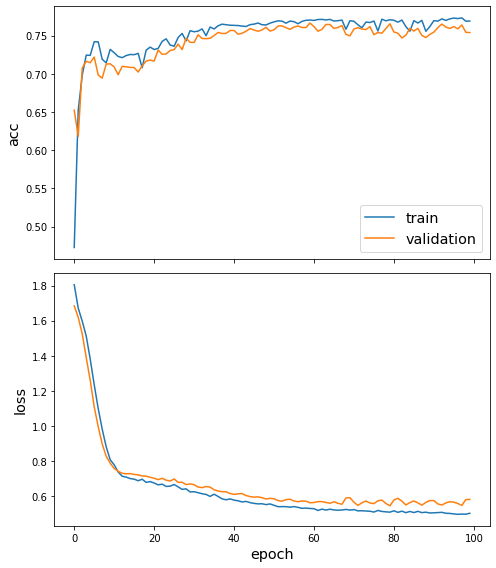

In [ ]:
sg.utils.plot_history(history)

In [ ]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 375ms/step - loss: 0.5772 - acc: 0.7581

Test Set Metrics:
	loss: 0.5772
	acc: 0.7581


In [ ]:
all_nodes = node_subjects.index
all_gen = generator.flow(all_nodes,use_ilocs=True)
all_predictions = model.predict(all_gen)

In [ ]:
node_predictions = target_encoding.inverse_transform(all_predictions.squeeze())

In [ ]:
df = pd.DataFrame({"Predicted": node_predictions, "True": node_subjects})
df.head(20)

,Predicted,True
0,rock,rock
1,rock,blues
2,hip hop,pop
3,rock,blues
4,rock,reggae
5,rock,rock
6,rock,pop
7,rock,rock
8,rock,rock
9,hip hop,reggae


In [ ]:
embedding_model = Model(inputs=x_in, outputs=x_out)

In [ ]:
emb = embedding_model.predict(all_gen)
emb.shape

(1, 51139, 128)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

transform = TSNE

In [ ]:
X = emb.squeeze(0)
X.shape

(51139, 128)

In [ ]:
trans = transform(n_components=2)
X_reduced = trans.fit_transform(X)
X_reduced.shape

(51139, 2)

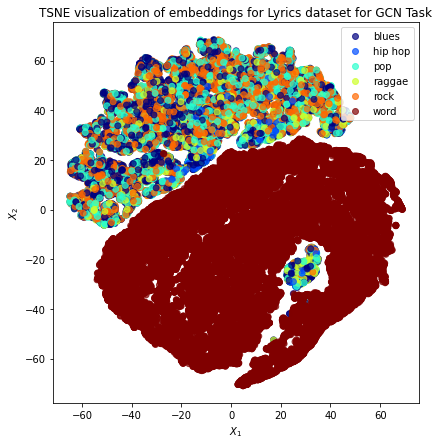

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter =ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=node_subjects.astype("category").cat.codes,
    cmap="jet",
    alpha=0.7,
)
ax.set(
    aspect="equal",
    xlabel="$X_1$",
    ylabel="$X_2$",
    title=f"{transform.__name__} visualization of embeddings for Lyrics dataset for GCN Task",
)
classes = ['blues','hip hop','pop','raggae','rock','word']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)